If we do a t-Distributed Stochastic Neighbour Embedding (t-SNE) decomposition
of mnsit dataset, we can see that we can separate the images to some extent just by
doing with two components on the image pixels

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [7]:
# Load MNIST dataset (70,000 images)
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

Loading MNIST dataset...


In [9]:
X.shape

(70000, 784)

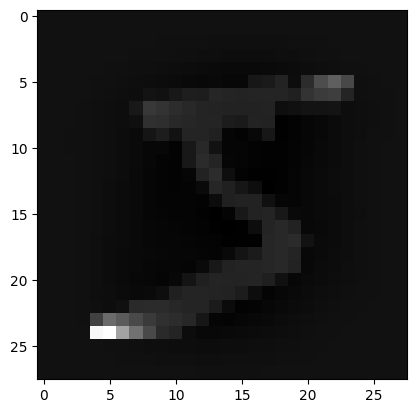

In [21]:
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [11]:
# Normalize data (optional, helps t-SNE performance)
X = StandardScaler().fit_transform(X)

In [12]:
# Take a smaller sample (t-SNE is slow on large datasets)
sample_size = 5000  # Adjust for speed/accuracy trade-off
X_sample, y_sample = X[:sample_size], y[:sample_size]

Applying t-SNE...


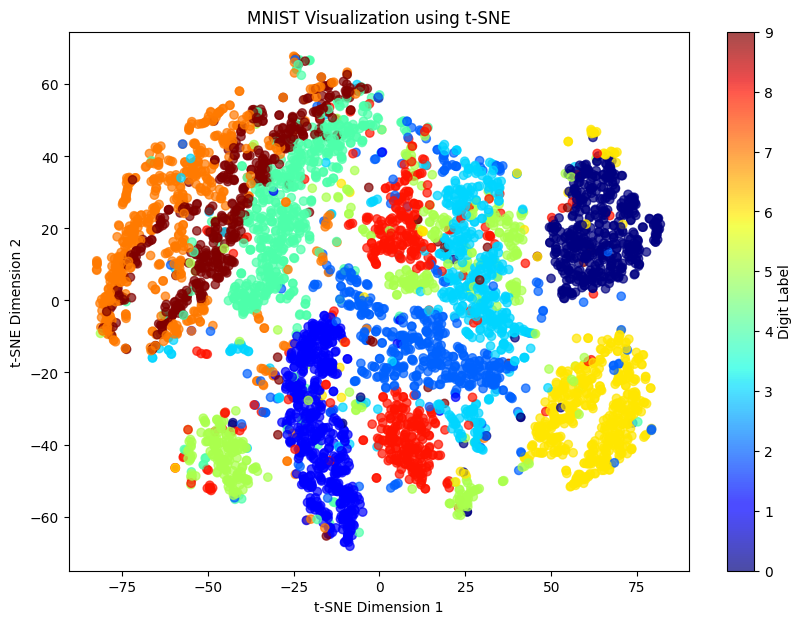

In [13]:
# Apply t-SNE to reduce to 2D
print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_sample)

# Plot the results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='jet', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("MNIST Visualization using t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()